<a href="https://colab.research.google.com/github/faganvaliyev/ML/blob/main/intro_to_computer_vision_with_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-09-09 12:11:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  20.1MB/s    in 6.7s    

2024-09-09 12:11:59 (15.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
for item in data_dir.glob('*'):
  print(item,'',item.name)

pizza_steak/train/steak  steak
pizza_steak/train/pizza  pizza


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class #'pizza_steak/train/steak'
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (382, 512, 3)


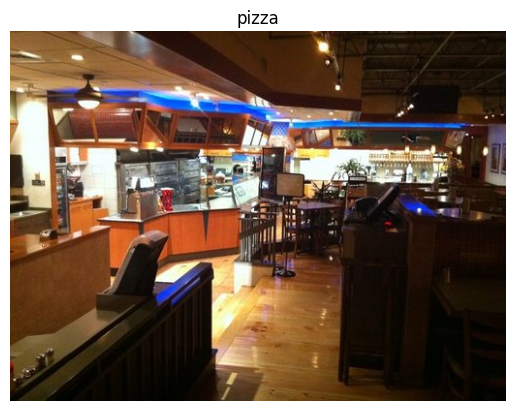

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class = 'pizza')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size =32,
                                               target_size= (224,224),
                                               class_mode = 'binary',
                                               seed=42)
test_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size =32,
                                               target_size= (224,224),
                                               class_mode = 'binary',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation= "relu",
                           strides = 1,
                           padding = 'same',
                           kernel_initializer  = 'he_normal',
                           ),
    tf.keras.layers.Conv2D(10 ,3, activation='relu',kernel_initializer  = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer ="he_normal"),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer ="he_normal"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='linear')
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model_1.fit(train_data,
                      epochs=5,
                      validation_data = test_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.4921 - loss: 1.4693 - val_accuracy: 0.7500 - val_loss: 0.5896
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.7058 - loss: 0.5423 - val_accuracy: 0.7180 - val_loss: 0.4667
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8064 - loss: 0.4101 - val_accuracy: 0.8620 - val_loss: 0.3684
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.8184 - loss: 0.3932 - val_accuracy: 0.7880 - val_loss: 0.3711
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.8324 - loss: 0.3726 - val_accuracy: 0.8100 - val_loss: 0.3468


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 107, 107, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(train_data,
          epochs=5,
          validation_data=test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.5218 - loss: 3.1092 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.5042 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.5110 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5043 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
                metrics=['accuracy'])

model_3.fit(train_data,
          epochs=5,
          validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.6465 - loss: 0.6223 - val_accuracy: 0.7660 - val_loss: 0.4786
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.7514 - loss: 0.5093 - val_accuracy: 0.7780 - val_loss: 0.4703
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7869 - loss: 0.4669 - val_accuracy: 0.7580 - val_loss: 0.4868
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.7895 - loss: 0.4622 - val_accuracy: 0.7920 - val_loss: 0.4307
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8111 - loss: 0.4231 - val_accuracy: 0.7980 - val_loss: 0.4201


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
print("ee")

ee


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)

In [ ]:
len(images),len(labels)

(32, 32)

In [ ]:
labels[3]

0.0

In [ ]:
from tensorflow.keras.optimizers import Adam,AdamW
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
tf.random.set_seed(42)
model_4 = Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    Conv2D(filters=100,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu'),
    Conv2D(100,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(100,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1166400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │       1,166,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,349,401 (5.15 MB)

 Trainable params: 1,349,401 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6004 - loss: 2.3191 - val_accuracy: 0.8240 - val_loss: 0.4363
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 320ms/step - accuracy: 0.7794 - loss: 0.4582 - val_accuracy: 0.8320 - val_loss: 0.3921
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 351ms/step - accuracy: 0.7832 - loss: 0.4734 - val_accuracy: 0.8260 - val_loss: 0.3965
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 325ms/step - accuracy: 0.8397 - loss: 0.4194 - val_accuracy: 0.8440 - val_loss: 0.3513
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - accuracy: 0.8555 - loss: 0.3495 - val_accuracy: 0.8400 - val_loss: 0.3379


In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8277 - loss: 0.3572


[0.3379362225532532, 0.8399999737739563]

<Axes: >

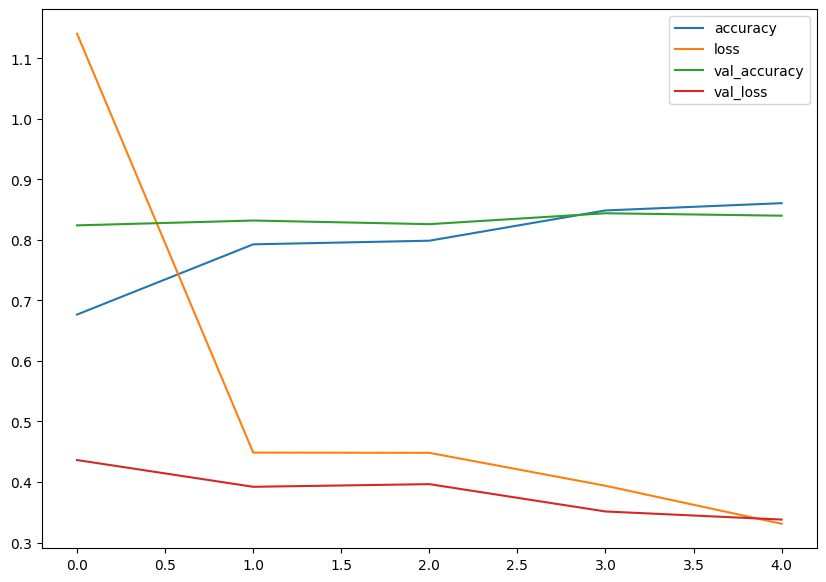

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss,label='traning_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='traning_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

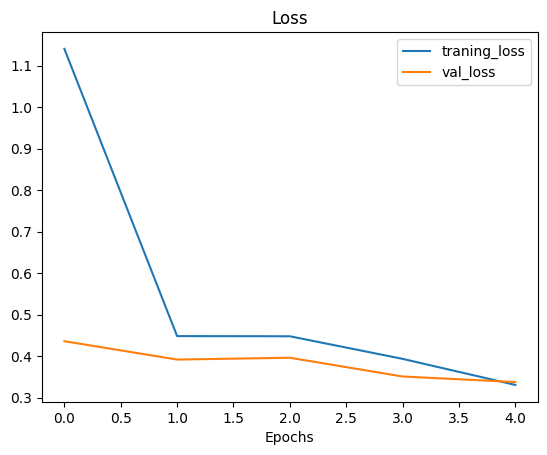

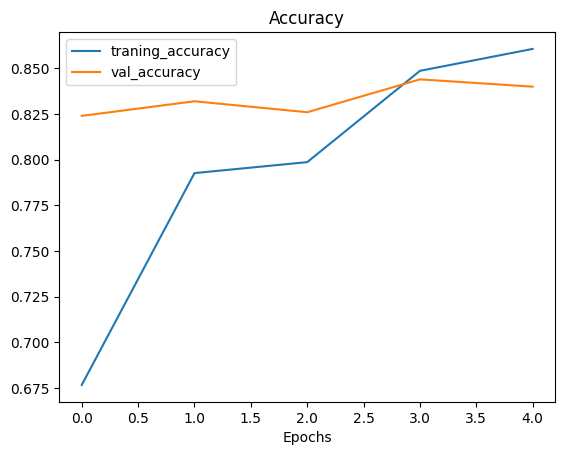

In [ ]:
plot_loss_curves(history_4)

In [ ]:
from tensorflow import keras

tf.random.set_seed(42)
model_4 = Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    Conv2D(filters=100,
           kernel_size=4,
           strides=5,
           padding='valid',
           activation='relu'),
    Conv2D(100,3,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=AdamW(),
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - accuracy: 0.5597 - loss: 0.7561 - val_accuracy: 0.7680 - val_loss: 0.5475
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.7606 - loss: 0.5026 - val_accuracy: 0.8220 - val_loss: 0.4554
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7811 - loss: 0.4647 - val_accuracy: 0.8520 - val_loss: 0.4006
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8112 - loss: 0.4094 - val_accuracy: 0.8560 - val_loss: 0.3699
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.8404 - loss: 0.3837 - val_accuracy: 0.8420 - val_loss: 0.3852


In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.8258 - loss: 0.3936


[0.38519909977912903, 0.8420000076293945]

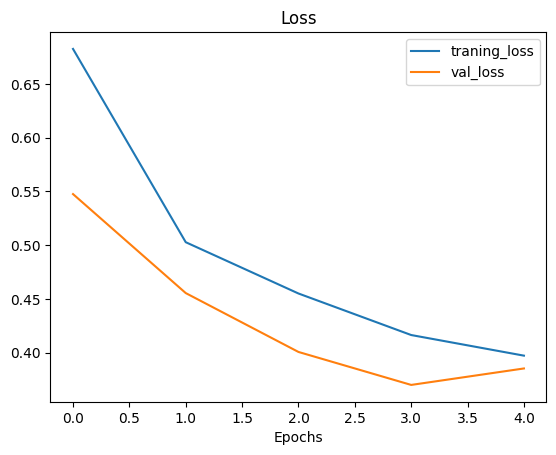

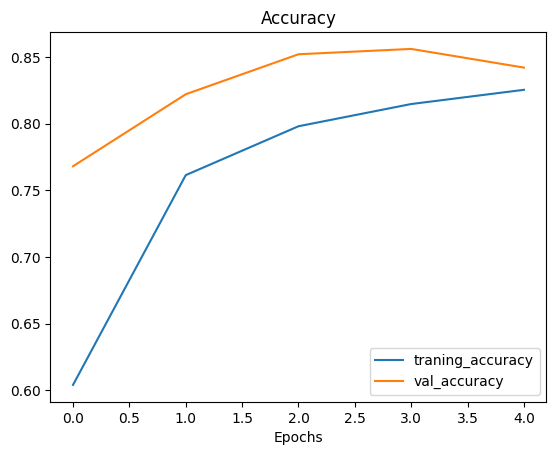

In [ ]:
plot_loss_curves(history_4)

In [ ]:
#Augamented dataset
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)

#Normal dataset
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("train data agumented")
IMG_SIZE = (224,224)


train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                               target_size=IMG_SIZE,
                                               class_mode='binary',
                                               batch_size=32)

print("Non-augamented train data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                 target_size=IMG_SIZE,
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=False)

print("Non-augamented test data:")
test_data=test_datagen.flow_from_directory(directory=train_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32,
                                           shuffle=False)

train data agumented
Found 1500 images belonging to 2 classes.
Non-augamented train data:
Found 1500 images belonging to 2 classes.
Non-augamented test data:
Found 1500 images belonging to 2 classes.


In [ ]:
images,labels=next(train_data)

augamented_images,augamented_labels=next(train_data_aug)

(-0.5, 223.5, 223.5, -0.5)

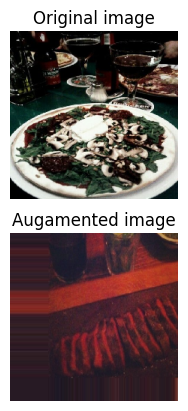

In [ ]:
import random
random_number = random.randint(1,31)
plt.subplot(2,1,1)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(augamented_images[random_number])
plt.title('Augamented image')
plt.axis('off')

In [ ]:
model_5=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_5=model_5.fit(train_data_aug,epochs=5,validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 476ms/step - accuracy: 0.5490 - loss: 0.6812 - val_accuracy: 0.7273 - val_loss: 0.5536
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 410ms/step - accuracy: 0.7161 - loss: 0.5554 - val_accuracy: 0.8033 - val_loss: 0.4321
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.7549 - loss: 0.5082 - val_accuracy: 0.8053 - val_loss: 0.4322
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 434ms/step - accuracy: 0.7719 - loss: 0.4727 - val_accuracy: 0.8100 - val_loss: 0.4194
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 449ms/step - accuracy: 0.7733 - loss: 0.4693 - val_accuracy: 0.8247 - val_loss: 0.3977


In [ ]:
print('Augamented and Shuffled train data')
train_data_augamented_and_shuffled = train_datagen_aug.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode='binary'
)

Augamented and Shuffled train data
Found 1500 images belonging to 2 classes.


In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_6 = model_6.fit(train_data_augamented_and_shuffled,epochs=5,validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 793ms/step - accuracy: 0.5593 - loss: 0.9525 - val_accuracy: 0.7780 - val_loss: 0.5002
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 461ms/step - accuracy: 0.7145 - loss: 0.5815 - val_accuracy: 0.7013 - val_loss: 0.6555
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 464ms/step - accuracy: 0.7131 - loss: 0.5885 - val_accuracy: 0.7193 - val_loss: 0.5632
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 453ms/step - accuracy: 0.7203 - loss: 0.5701 - val_accuracy: 0.6800 - val_loss: 0.5613
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 477ms/step - accuracy: 0.7387 - loss: 0.5175 - val_accuracy: 0.8187 - val_loss: 0.4325


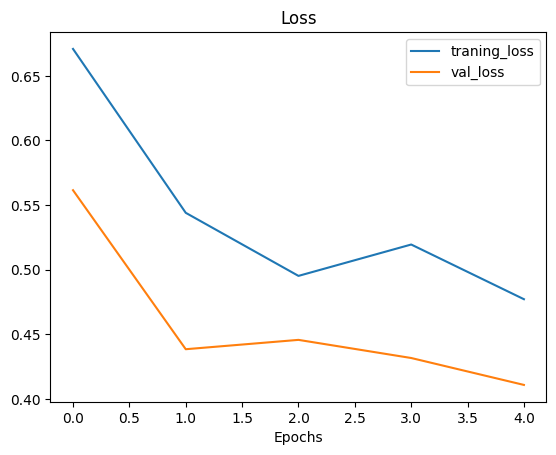

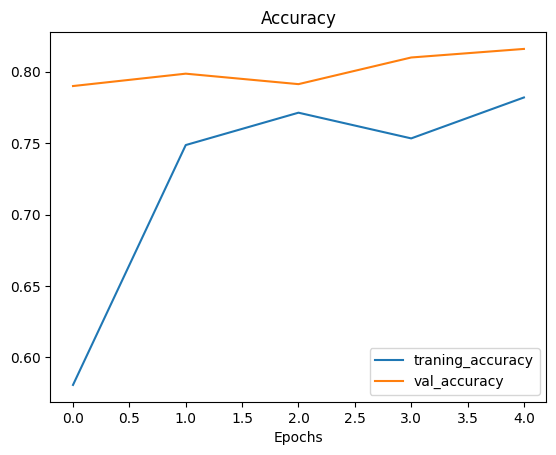

In [ ]:
plot_loss_curves(history_5)

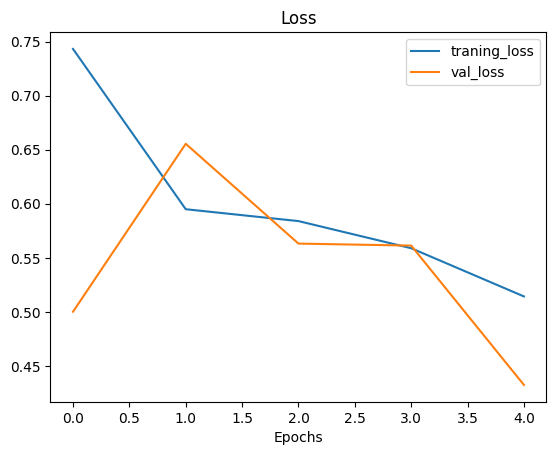

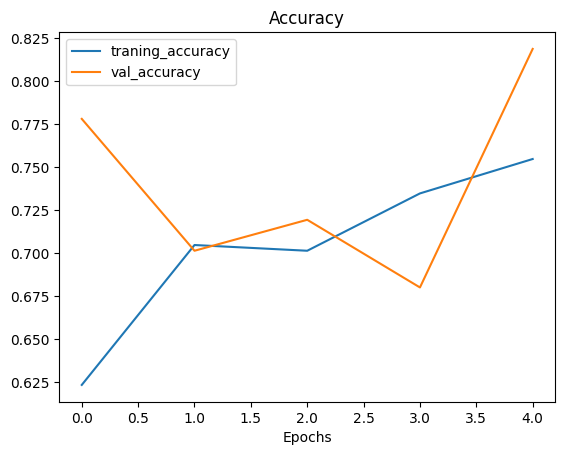

In [ ]:
plot_loss_curves(history_6)

In [ ]:
print("dd")

dd


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-09-11 12:19:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   127MB/s    in 4.0s    

2024-09-11 12:19:14 (124 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 10 directorie

In [ ]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
def view_random_image(target_dir,target_class):
  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)

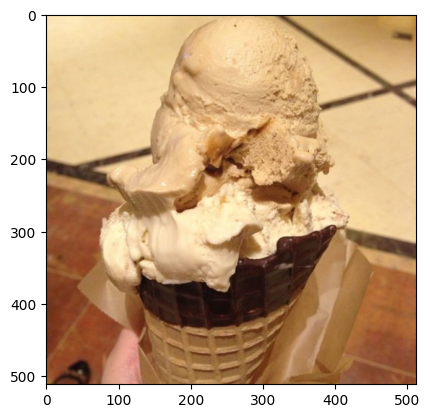

In [ ]:
import random
view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size= (224,224),
                                               class_mode = 'categorical',
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode = 'categorical',
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
len(class_names)

10

In [ ]:
model_1_cat = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')

])

In [ ]:
model_1_cat.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0005),
                    metrics=['accuracy'])

In [ ]:
model_1_cat.fit(train_data,
                epochs=5,
                validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 152ms/step - accuracy: 0.1642 - loss: 2.2218 - val_accuracy: 0.3152 - val_loss: 1.9460
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.3733 - loss: 1.8290 - val_accuracy: 0.3400 - val_loss: 1.8780
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.4957 - loss: 1.5152 - val_accuracy: 0.3336 - val_loss: 1.9458
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.6739 - loss: 1.0349 - val_accuracy: 0.3324 - val_loss: 2.1541
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.8703 - loss: 0.4788 - val_accuracy: 0.3268 - val_loss: 2.7238


In [ ]:
model_1_cat.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.3160 - loss: 2.8216


[2.7238457202911377, 0.32679998874664307]

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                                 target_size=(224,224),
                                                 class_mode='categorical',
                                                 batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
tf.random.set_seed(42)

model_2_cat = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(256,5,strides=2,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128,5,strides=2,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,5,strides=2,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,5,strides=2,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model_2_cat.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0005),
                    metrics=['accuracy'])

In [ ]:
model_2_cat.fit(train_data_aug,
                epochs=5,
                batch_size=32,
                validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.1220 - loss: 2.3052

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 506ms/step - accuracy: 0.1222 - loss: 2.3049 - val_accuracy: 0.2004 - val_loss: 2.1552
Epoch 2/5


In [ ]:
model_2_cat.summary()

<ipython-input-20-73c90b52940e>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, n)


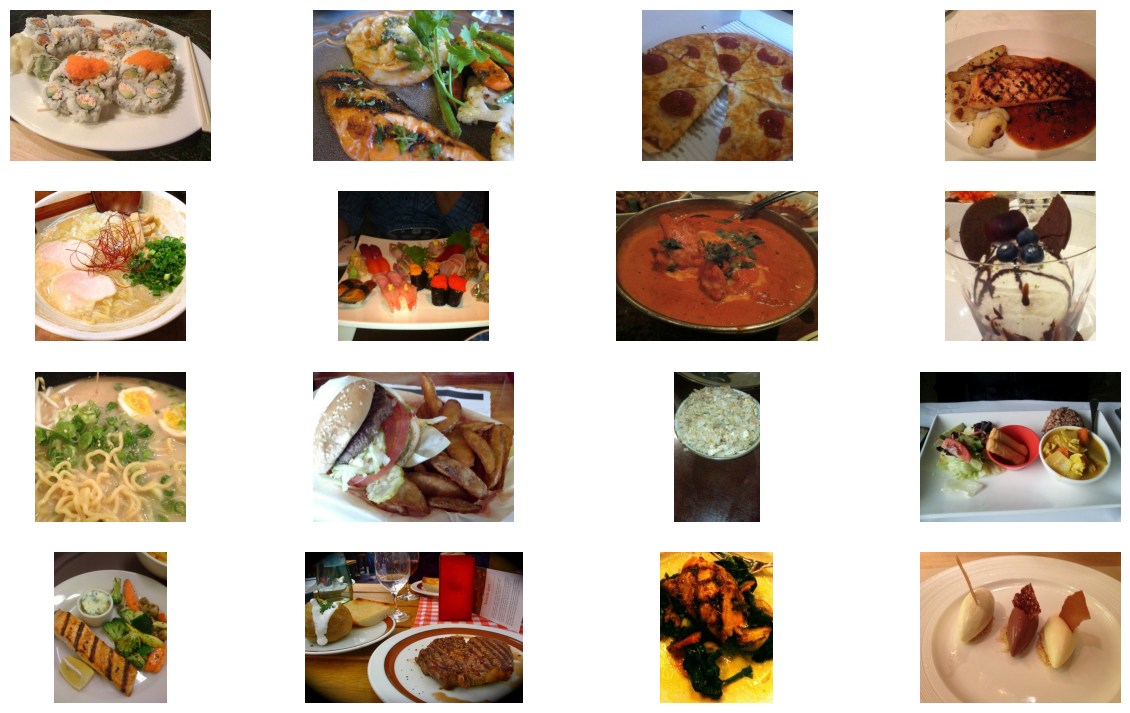

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


images = []
for folder in os.listdir(train_dir):
  for image in os.listdir(train_dir + '/' + folder):
    images.append(os.path.join(train_dir, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

In [ ]:
resnet_50 = tf.keras.applications.ResNet50(include_top= False)
for layer in resnet_50.layers:
  layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
for layer in resnet_50.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1

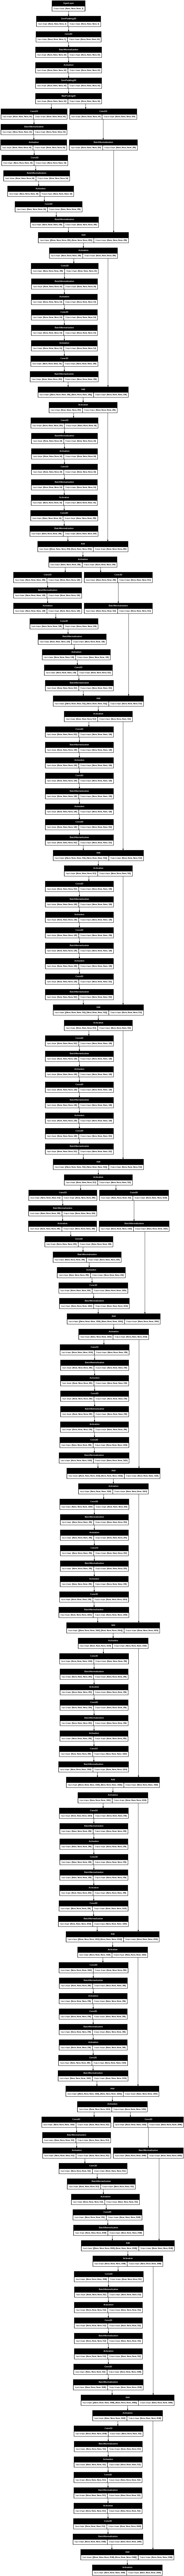

In [ ]:
tf.keras.utils.plot_model(resnet_50,show_shapes=True,dpi=50)

In [ ]:
image_size = (224,224)
model_t = tf.keras.Sequential([
    tf.keras.layers.Input(shape = image_size + (3,)),
    resnet_50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])


model_t.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_t.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │       1,003,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,591,242 (93.81 MB)

 Trainable params: 1,003,530 (3.83 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model_t.fit(train_data,epochs=5,batch_size=32,validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.1342 - loss: 6.3649

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 176ms/step - accuracy: 0.1343 - loss: 6.3551 - val_accuracy: 0.2332 - val_loss: 2.6475
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.2194 - loss: 2.7976 - val_accuracy: 0.2020 - val_loss: 3.2685
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.2697 - loss: 2.8253 - val_accuracy: 0.2616 - val_loss: 2.7421
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 139ms/step - accuracy: 0.3067 - loss: 2.3480 - val_accuracy: 0.2520 - val_loss: 3.2637
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.3261 - loss: 2.4784 - val_accuracy: 0.2260 - val_loss: 2.7567


In [ ]:
eff_net = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top= False)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
image_size = (224,224)
model_e = tf.keras.Sequential([
    tf.keras.layers.Input(shape = image_size + (3,)),
    eff_net,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])


model_e.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_e.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │         627,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,546,522 (24.97 MB)

 Trainable params: 6,485,914 (24.74 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [ ]:
model_e_history = model_e.fit(train_data,
                              batch_size=32,
                              epochs=5,
                              validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - accuracy: 0.7623 - loss: 0.9148 - val_accuracy: 0.1000 - val_loss: 2.6225
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 151ms/step - accuracy: 0.8265 - loss: 0.6971 - val_accuracy: 0.1000 - val_loss: 4.6047
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.8816 - loss: 0.5059 - val_accuracy: 0.1140 - val_loss: 3.6713
Epoch 4/5
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9129 - loss: 0.4045